In [11]:
import pandas as pd
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm

In [2]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [67]:
# Q1 Data_preprocessing
# read data
loan_train,loan_test = pd.read_csv('/content/drive/MyDrive/Assignment1/loan_train.csv'),\
pd.read_csv('/content/drive/MyDrive/Assignment1/loan_test.csv')
# extract badloans
badloan_train, badloan_test = loan_train['bad_loans'], loan_test['bad_loans']
loan_train = loan_train.drop('bad_loans',axis=1)
loan_test = loan_test.drop('bad_loans',axis=1)
#loan_train

In [68]:
# Q1.a Process grade, convert it to ordinal data
from sklearn.preprocessing import OrdinalEncoder
ord_encoder = OrdinalEncoder()

grade_train, grade_test = loan_train['grade'], loan_test['grade']
grade_train, grade_test = np.array(grade_train).reshape(-1,1), np.array(grade_test).reshape(-1,1)
grade_train, grade_test = ord_encoder.fit_transform(grade_train), ord_encoder.fit_transform(grade_test)
loan_train['grade'], loan_test['grade'] = grade_train, grade_test

In [69]:
# Q1.b Process categorical features to numerical features
from sklearn.preprocessing import OneHotEncoder
# select categorical features
cat_features_list = ['home_ownership', 'purpose', 'term']

oh_encoder = OneHotEncoder(categories='auto', sparse=False, handle_unknown='ignore')

cat_features_train, cat_features_test = loan_train[cat_features_list], loan_test[cat_features_list]

cat_features_encoded_train, cat_features_encoded_test = oh_encoder.fit_transform(cat_features_train), oh_encoder.fit_transform(cat_features_test)

home_ownership_types = list(map(lambda x: 'home_ownership_'+x,oh_encoder.categories_[0]))
purpose_types = list(map(lambda x: 'purpose_'+x,oh_encoder.categories_[1]))
num_features = ['grade', 'short_emp', 'emp_length_num', 'dti',
                'last_delinq_none', 'last_major_derog_none', 'revol_util',
                'total_rec_late_fee']
loan_processed_train = pd.DataFrame(np.concatenate([loan_train[num_features], cat_features_encoded_train], axis=1),\
                                    columns=num_features + home_ownership_types + purpose_types + ['36 months', '60 months'])
loan_processed_test = pd.DataFrame(np.concatenate([loan_test[num_features], cat_features_encoded_test], axis=1),\
                                    columns=num_features + home_ownership_types + purpose_types + ['36 months', '60 months'])

/usr/local/lib/python3.8/dist-packages/sklearn/preprocessing/_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/preprocessing/_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [70]:
# Unprocessed data
loan_train_unprocess,loan_test_unprocess = pd.read_csv('/content/drive/MyDrive/Assignment1/loan_train.csv'),\
pd.read_csv('/content/drive/MyDrive/Assignment1/loan_test.csv')

cat_features_list_unprocess = ['grade', 'home_ownership', 'purpose', 'term']
cat_features_train_unprocess, cat_features_test_unprocess = loan_train_unprocess[cat_features_list_unprocess], loan_test_unprocess[cat_features_list_unprocess]
cat_features_encoded_train_unprocess, cat_features_encoded_test_unprocess = oh_encoder.fit_transform(cat_features_train_unprocess), oh_encoder.fit_transform(cat_features_test_unprocess)
print(oh_encoder.categories_[0])
grade_types_unprocess = list(map(lambda x: 'grade_'+x,oh_encoder.categories_[0]))
home_ownership_types = list(map(lambda x: 'home_ownership_'+x,oh_encoder.categories_[1]))
purpose_types_unprocess = list(map(lambda x: 'purpose_'+x,oh_encoder.categories_[2]))
num_features_unprocess = ['short_emp', 'emp_length_num', 'dti',
                'last_delinq_none', 'last_major_derog_none', 'revol_util',
                'total_rec_late_fee']
loan_train_unprocess = pd.DataFrame(np.concatenate([loan_train[num_features_unprocess], cat_features_encoded_train_unprocess], axis=1),\
                                    columns=num_features_unprocess + grade_types_unprocess + home_ownership_types + purpose_types_unprocess + ['36 months', '60 months'])
loan_test_unprocess = pd.DataFrame(np.concatenate([loan_test[num_features_unprocess], cat_features_encoded_test_unprocess], axis=1),\
                                    columns=num_features_unprocess + grade_types_unprocess + home_ownership_types + purpose_types_unprocess + ['36 months', '60 months'])
print(loan_train_unprocess)
print(loan_test_unprocess)

/usr/local/lib/python3.8/dist-packages/sklearn/preprocessing/_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/preprocessing/_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


['A' 'B' 'C' 'D' 'E' 'F' 'G']
        short_emp  emp_length_num    dti  last_delinq_none  \
0             0.0             6.0  24.00               1.0   
1             0.0             8.0  23.92               1.0   
2             0.0            11.0  16.69               0.0   
3             0.0            11.0  14.86               0.0   
4             0.0             4.0   1.06               1.0   
...           ...             ...    ...               ...   
110341        1.0             0.0  15.86               0.0   
110342        0.0             4.0  25.20               1.0   
110343        0.0            11.0  23.47               1.0   
110344        0.0            11.0  13.27               1.0   
110345        1.0             1.0   6.94               0.0   

        last_major_derog_none  revol_util  total_rec_late_fee  grade_A  \
0                         1.0        73.4                 0.0      0.0   
1                         1.0        57.6                 0.0      0.0   
2  

In [71]:
# Q1.c Normalize all features
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
loan_processed_std_train, loan_processed_std_test = scaler.fit_transform(loan_processed_train), scaler.fit_transform(loan_processed_test)
loan_processed_std_train = pd.DataFrame(loan_processed_std_train,\
                                    columns=num_features + home_ownership_types + purpose_types + ['36 months', '60 months'])
loan_processed_std_test = pd.DataFrame(loan_processed_std_test,\
                                    columns=num_features + home_ownership_types + purpose_types + ['36 months', '60 months'])
#loan_processed_std_train.describe()
loan_processed_std_test.describe()

,grade,short_emp,emp_length_num,dti,last_delinq_none,last_major_derog_none,revol_util,total_rec_late_fee,home_ownership_MORTGAGE,home_ownership_OTHER,...,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_small_business,purpose_vacation,purpose_wedding,36 months,60 months
count,12261.000000,12261.000000,12261.000000,12261.000000,12261.000000,12261.000000,12261.000000,12261.000000,12261.000000,12261.000000,...,12261.000000,12261.000000,12261.000000,12261.00000,12261.000000,12261.000000,12261.000000,12261.000000,12261.000000,12261.000000
mean,0.293532,0.124378,0.574282,0.385187,0.587880,0.875296,0.418105,0.004876,0.478835,0.001550,...,0.009135,0.032624,0.011337,0.00889,0.077237,0.027404,0.007585,0.011581,0.796917,0.203083
std,0.226260,0.330026,0.340488,0.187093,0.492237,0.330397,0.202091,0.035139,0.499572,0.039336,...,0.095142,0.177657,0.105873,0.09387,0.266978,0.163264,0.086765,0.106996,0.402310,0.402310
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.166667,0.000000,0.272727,0.245236,0.000000,1.000000,0.267760,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,0.333333,0.000000,0.545455,0.379890,1.000000,1.000000,0.434817,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,0.500000,0.000000,1.000000,0.518806,1.000000,1.000000,0.580796,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


100%|██████████| 7/7 [12:32<00:00, 107.52s/it]


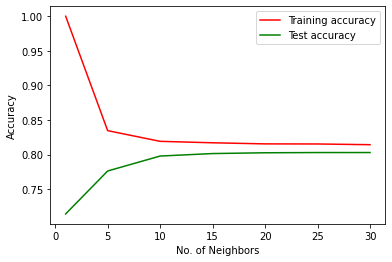

In [72]:
# Q2
# Processed data for KNN
from sklearn.neighbors import KNeighborsClassifier
# loop to compute test and training accuracy
k_neighbors = [1, 5, 10, 15, 20, 25, 30]
knn_models = []
train_accuracy_knn = []
test_accuracy_knn = []
for n_neighbors in tqdm(k_neighbors):
    knn_model = KNeighborsClassifier(n_neighbors=n_neighbors)
    knn_model.fit(loan_processed_std_train,badloan_train)
    knn_models.append(knn_model)
    train_accuracy_knn.append(knn_model.score(loan_processed_std_train, badloan_train))    
    test_accuracy_knn.append(knn_model.score(loan_processed_std_test, badloan_test))

# plotting figures
plt.figure()
plt.plot(k_neighbors,train_accuracy_knn, c='r', label='Training accuracy')
plt.plot(k_neighbors,test_accuracy_knn, c='g', label='Test accuracy')
plt.xlabel("No. of Neighbors")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


In [73]:
print("The best parameter of unporcessed data is :", k_neighbors[test_accuracy_knn.index(max(test_accuracy_knn))])
print("Train accuracy:", max(test_accuracy_knn))
print("Test  accuracy:", max(test_accuracy_knn))

The best parameter of unporcessed data is : 25
Train accuracy: 0.8030340102764865
Test  accuracy: 0.8030340102764865


100%|██████████| 7/7 [11:28<00:00, 98.29s/it]


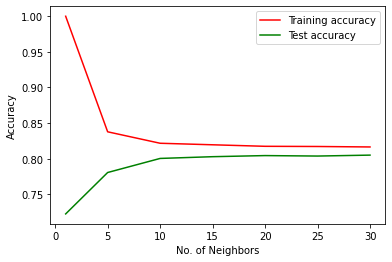

In [74]:
# Unprocessed data
k_neighbors = [1, 5, 10, 15, 20, 25, 30]
knn_models = []
train_accuracy_knn = []
test_accuracy_knn = []
for n_neighbors in tqdm(k_neighbors):
    knn_model = KNeighborsClassifier(n_neighbors=n_neighbors)
    knn_model.fit(loan_train_unprocess,badloan_train)
    knn_models.append(knn_model)
    train_accuracy_knn.append(knn_model.score(loan_train_unprocess, badloan_train))    
    test_accuracy_knn.append(knn_model.score(loan_test_unprocess, badloan_test))

# plotting figures
plt.figure()
plt.plot(k_neighbors,train_accuracy_knn, c='r', label='Training accuracy')
plt.plot(k_neighbors,test_accuracy_knn, c='g', label='Test accuracy')
plt.xlabel("No. of Neighbors")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [75]:
print("The best parameter of unporcessed data is :", k_neighbors[test_accuracy_knn.index(max(test_accuracy_knn))])
print("Train accuracy:", max(test_accuracy_knn))
print("Test  accuracy:", max(test_accuracy_knn))

The best parameter of unporcessed data is : 30
Train accuracy: 0.8051545550933855
Test  accuracy: 0.8051545550933855


100%|██████████| 39/39 [00:42<00:00,  1.09s/it]


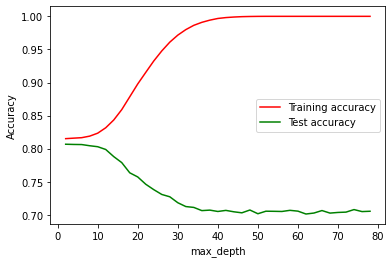

In [76]:
# Processed data, using decision tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

dt_depths = [i*2 for i in range(1, 40)]

dt_models = []
train_accuracy_dt = []
test_accuracy_dt = []
for depth in tqdm(dt_depths):
    dt_model = DecisionTreeClassifier(max_depth=depth)
    dt_model.fit(loan_processed_std_train,badloan_train)
    dt_models.append(dt_model)
    train_accuracy_dt.append(dt_model.score(loan_processed_std_train, badloan_train))    
    test_accuracy_dt.append(dt_model.score(loan_processed_std_test, badloan_test))

# plotting figures
plt.figure()
plt.plot(dt_depths,train_accuracy_dt, c='r', label='Training accuracy')
plt.plot(dt_depths,test_accuracy_dt, c='g', label='Test accuracy')
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


In [77]:
print("The best parameter of unporcessed data is :", dt_depths[test_accuracy_dt.index(max(test_accuracy_dt))])
print("Train accuracy:", max(test_accuracy_dt))
print("Test  accuracy:", max(test_accuracy_dt))

The best parameter of unporcessed data is : 2
Train accuracy: 0.8067857434140772
Test  accuracy: 0.8067857434140772


100%|██████████| 39/39 [00:48<00:00,  1.24s/it]


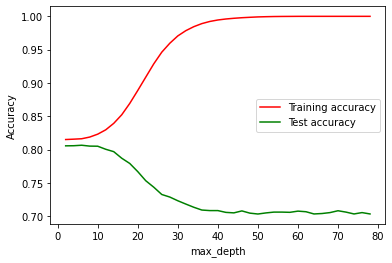

In [78]:
# Unprocessed data, using decision tree
dt_depths = [i*2 for i in range(1, 40)]

dt_models = []
train_accuracy_dt = []
test_accuracy_dt = []
for depth in tqdm(dt_depths):
    dt_model = DecisionTreeClassifier(max_depth=depth)
    dt_model.fit(loan_train_unprocess,badloan_train)
    dt_models.append(dt_model)
    train_accuracy_dt.append(dt_model.score(loan_train_unprocess, badloan_train))    
    test_accuracy_dt.append(dt_model.score(loan_test_unprocess, badloan_test))

# plotting figures
plt.figure()
plt.plot(dt_depths,train_accuracy_dt, c='r', label='Training accuracy')
plt.plot(dt_depths,test_accuracy_dt, c='g', label='Test accuracy')
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [95]:
print("The best parameter of unporcessed data is :", dt_depths[test_accuracy_dt.index(max(test_accuracy_dt))])
print("Train accuracy:", max(test_accuracy_dt))
print("Test  accuracy:", max(test_accuracy_dt))

The best parameter of unporcessed data is : 6
Train accuracy: 0.8065410651659735
Test  accuracy: 0.8065410651659735


In [5]:
# Q3
# data processing
data_train = pd.read_csv('/content/drive/MyDrive/Assignment1/Q3_train.csv')

# drop data of 2008 and 2009
data_train = data_train.drop(data_train[(data_train['DataYr'] == 2008) | (data_train['DataYr'] == 2009)].index)
data_train = data_train.reset_index(drop=True)

# split data of 2018 as test data
data_test_index = data_train.loc[(data_train['DataYr'] == 2018)].index
data_test = data_train.iloc[data_test_index,:]

data_train = data_train.drop(data_test_index).reset_index(drop=True)

# extract y_train and y_test
y_train = data_train['epsfiy'].reset_index(drop=True)
y_test = data_test['epsfiy'].reset_index(drop=True)

# extract X_train and X_test
col_epsfiy = ['epsfiy.' + str(i) for i in range(1,9)]
X_train = data_train.loc[:,col_epsfiy].reset_index(drop=True)
X_test = data_test.loc[:,col_epsfiy].reset_index(drop=True)

In [6]:
# training model
import xgboost as xgb  
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, KFold
from sklearn.metrics import mean_squared_error


# Define parameter grid for grid search
param_grid = {
    'n_estimators': range(20, 201, 30),
    'max_depth': [3, 4, 5]
}

# Perform grid search with 5-fold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)
grid_search = GridSearchCV(xgb.XGBRegressor(learning_rate=0.1,random_state=42), param_grid, cv=kf, scoring='neg_root_mean_squared_error')
grid_search.fit(X_train, y_train)


# Define parameter distributions for random search
param_dist = {
    'n_estimators': range(20, 201),
    'max_depth': np.random.choice([3, 4, 5], size=60, p=[1/3, 1/3, 1/3])
}

# Perform random search with 5-fold cross-validation
random_search = RandomizedSearchCV(xgb.XGBRegressor(learning_rate=0.1, random_state=42), param_distributions=param_dist, cv=kf, n_iter=60, scoring='neg_root_mean_squared_error', random_state=42)
random_search.fit(X_train, y_train)
 

RandomizedSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, gpu_id=None,
                                          grow_policy=None,
                                          importance_type=Non...
                                          monotone_constraints=None,
                                          n_estimators=100, n_jobs=None,
                                          num_parallel_tree=None,
                                          predictor=None, random_state=42, ...),
                   n_iter=60,
                   param_distributions={'max_depth': array([4, 3, 4, 3, 5, 4, 3, 5, 3, 4, 3, 5, 5, 3, 3, 5, 4, 3, 4, 5, 5, 5,
       3, 5, 4, 3, 5, 3, 4, 3, 3, 4, 4, 5, 4, 4, 4, 5, 3, 5, 4, 3, 5, 5,
       5, 4, 3, 3, 3, 4, 3, 4, 5, 4, 3, 5, 3, 4, 3, 4]),
                                        'n_estimators': range(20, 201)},
                   random_state=42, scoring='neg_root_mean_squared_error')

In [7]:
# Q3 Report
print('Report the best parameters and rmse for best result:')
print('##############################################################################################')
print('Grid Search Best Parameters: ', grid_search.best_params_)
print('Grid Search Best RMSE: ', -grid_search.best_score_)

print('Random Search Best Parameters: ', random_search.best_params_)
print('Random Search Best RMSE: ', -random_search.best_score_)

# Compare best parameter values and performance results
print('Grid Search vs Random Search:')
print('Best Parameters: ', grid_search.best_params_, ' vs ', random_search.best_params_)
print('Best RMSE: ', -grid_search.best_score_, ' vs ', -random_search.best_score_)
print('From above, we can see the results are similar.')
print('##############################################################################################')
# Evaluate best models on test set and report prediction performance
best_grid_model = grid_search.best_estimator_
best_random_model = random_search.best_estimator_

y_pred_grid = best_grid_model.predict(X_test)
y_pred_random = best_random_model.predict(X_test)

# Calculate the RMSE for each model
grid_rmse = mean_squared_error(y_test, y_pred_grid, squared=False)
random_rmse = mean_squared_error(y_test, y_pred_random, squared=False)
print("Predicted grid rmse:", grid_rmse)
print("Predicted random rmse:", random_rmse)

Report the best parameters and rmse for best result:
##############################################################################################
Grid Search Best Parameters:  {'max_depth': 3, 'n_estimators': 20}
Grid Search Best RMSE:  10.369226509285067
Random Search Best Parameters:  {'n_estimators': 28, 'max_depth': 3}
Random Search Best RMSE:  10.439034031456085
Grid Search vs Random Search:
Best Parameters:  {'max_depth': 3, 'n_estimators': 20}  vs  {'n_estimators': 28, 'max_depth': 3}
Best RMSE:  10.369226509285067  vs  10.439034031456085
From above, we can see the results are similar.
##############################################################################################
Predicted grid rmse: 2.8219068630627935
Predicted random rmse: 2.7471257192727943


In [8]:
# Q4 Stacked classifier
#from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestRegressor
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor

# define the base models
rf = RandomForestRegressor(random_state=42)
lgbm = LGBMRegressor(random_state=42)

In [12]:
from sklearn.ensemble import StackingRegressor

# define a stacking ensemble of models
def get_model(n_estimators):
    # define the level-0 base models with default paramters
    level0 = []
    level0.append(('rf', rf))
    level0.append(('lgbm', lgbm))
    # define the level-1 model with n_estimators to be tuned
    level1 = XGBRegressor(n_estimators = n_estimators,random_state=42)
    
    # define the stacking ensemble
    model = StackingRegressor(estimators=level0, final_estimator=level1)
    return model
    

# tune n_estimators to get the relative better stacking model
best_score = 100000
best_estimator = 0
for estimator in tqdm(range(10, 50, 10)):
  stacking_model = get_model(estimator)
  stack = stacking_model.fit(X_train, y_train)
  y_pred = stack.predict(X_test)
  rmse = np.sqrt(mean_squared_error(y_test, y_pred))
  if rmse < best_score:
    best_score = rmse
    best_stacking_model = stacking_model
    best_estimator = estimator

100%|██████████| 4/4 [22:34<00:00, 338.74s/it]


In [16]:
print('RMSE of best model:', best_score)
print('best_estimator:',best_estimator)
#print('best_stacking_model:',best_stacking_model)
#print('best_stacking_model score:'best_stacking_model.score(X_test, y_test))

RMSE of best model: 3.3152443728900893
best_estimator: 20


In [17]:
# Q5 Tune my model to predict data in 2019

# use data including 2018 to train the model
data_train = pd.read_csv('/content/drive/MyDrive/Assignment1/Q3_train.csv')

# drop data of 2008 and 2009
data_train = data_train.drop(data_train[(data_train['DataYr'] == 2008) | (data_train['DataYr'] == 2009)].index)
data_train = data_train.reset_index(drop=True)

y_train = data_train['epsfiy'].reset_index(drop=True)
col_epsfiy = ['epsfiy.' + str(i) for i in range(1,9)]
X_train = data_train.loc[:,col_epsfiy].reset_index(drop=True)

data2019 = pd.read_csv('/content/drive/MyDrive/Assignment1/Q5_test.csv')
X_pred = data2019.loc[:,col_epsfiy].reset_index(drop=True)
X_pred

,epsfiy.1,epsfiy.2,epsfiy.3,epsfiy.4,epsfiy.5,epsfiy.6,epsfiy.7,epsfiy.8
0,0.62,0.43,0.41,0.08,-0.35,0.31,1.64,1.03
1,3.03,2.33,1.52,0.34,2.61,3.76,2.41,0.67
2,-0.21,-0.23,0.14,0.17,-0.09,0.25,0.16,0.00
3,1.20,0.76,0.33,0.03,-0.16,0.39,0.19,0.75
4,4.54,4.31,1.51,0.03,4.35,4.16,1.70,0.21
...,...,...,...,...,...,...,...,...
2299,2.56,1.15,0.96,1.60,0.81,0.84,0.50,0.61
2300,0.87,0.81,0.36,0.28,0.96,0.92,0.41,1.19
2301,0.05,0.00,-0.01,-0.02,0.16,0.03,0.00,0.01
2302,0.05,0.16,0.12,0.14,1.40,1.62,-2.72,-1.16


In [18]:
# Choose the model with the best performance:
if min(grid_rmse, best_score, random_rmse) == grid_rmse:
  my_model = best_grid_model
  print('My best model is:')
  print(my_model)
elif min(grid_rmse, best_score, random_rmse) == random_rmse:
  my_model = best_random_model
  print('My best model is:')
  print(my_model)
elif min(grid_rmse, best_score, random_rmse) == best_score:
  my_model = best_stacking_model
  print('My best model is:')
  print(my_model)

my_model_fitted = my_model.fit(X_train, y_train)
y_pred = my_model_fitted.predict(X_pred)

df = pd.DataFrame({'id': data2019['ID'], 'epsfiy': y_pred})
print('Predicted epsfiy:')
print(df)
df.to_csv('predicted_epsfiy_2019.csv', index=False)

My best model is:
XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=28, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=42, ...)
Predicted epsfiy:
          id    epsfiy
0         44  0.899146
1         92  1.719992
2        140 -0.197259
3        188  1.218545
4        236  1.319915
...      ...       ...
2299  110588  1.935616
2300  110636  1.066254
2301  110684  0.090132
